In [1]:
import os
import numpy as np
import scipy

from sklearn.preprocessing import MinMaxScaler, minmax_scale
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
#import seaborn as sns

In [2]:
def free_energy(n_motions, embedding):
    '''
    Calculate free energy using Boltzmann relation.
    Bin data points into two coordinate and count the points inside each grids.
    '''
    # counts
    gridx = np.linspace(0, 1, n_motions+1)
    gridy = np.linspace(0, 1, n_motions+1)
    grids, edges = np.histogramdd(embedding,  bins=[gridx, gridy])
    grids = grids.T
    # energy
    E = -np.log(grids/np.max(grids))
    E[E==np.inf] = np.unique(E)[-2] + 0.00001 # replace inf to second highest energy plus constant.
    return E

In [3]:
workdir = '/home/danlin/synth_hsp90_test/3_Occupancies'

Text(0, 0.5, 'Conformational changes 2')

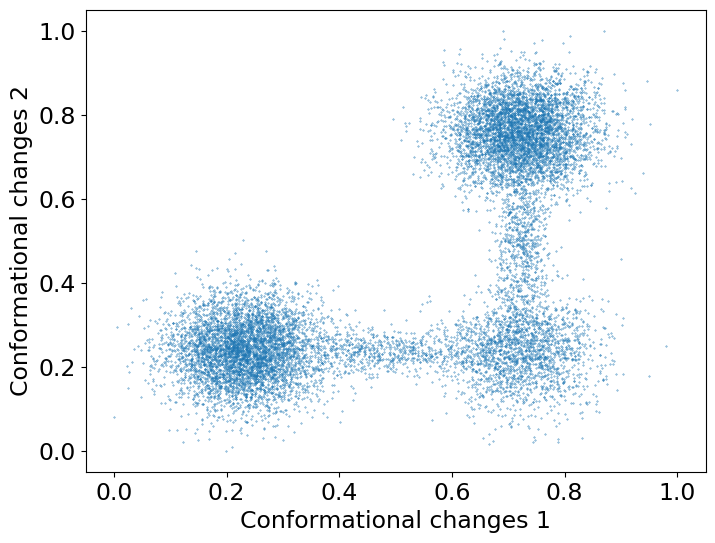

In [4]:
np.random.seed(915)
center_samples = 5000
transition_samples = 2000

center1 = np.random.normal(0, 8, size=(center_samples, 2)) + np.array([-30, -30])
transition = np.random.normal(0, 8, size=(transition_samples, 2)) + np.array([-30, 30])
center2 = np.random.normal(0, 8, size=(center_samples, 2)) + np.array([30, 30])

high_prob_path = 700
C = np.array([[0.0, 3], [11, 0.0]])
transition1 = np.dot(np.random.normal(0,1, size=(high_prob_path, 2)), C) + np.array([0,30])
C1 = np.array([[0.0, 11], [3, 0.]])
transition2 = np.dot(np.random.normal(0,1, size=(high_prob_path, 2)), C1) + np.array([-30,0])

x = np.vstack([center1, transition, center2, transition1, transition2])
x = minmax_scale(x)
plt.figure(figsize=(8,6))
plt.scatter(x[:,1], x[:,0], s=0.1)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.xlabel('Conformational changes 1', fontsize=17)
plt.ylabel('Conformational changes 2', fontsize=17)

Text(0, 0.5, 'Conformational changes 2')

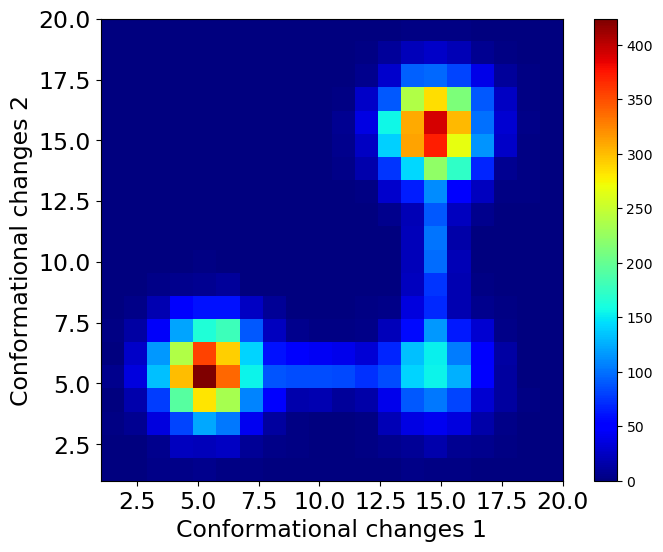

In [5]:
n_motions = 20
gridx = np.linspace(0, 1, n_motions+1)
gridy = np.linspace(0, 1, n_motions+1)
grids, edges = np.histogramdd(x,  bins=[gridx, gridy])
plt.figure(figsize=(8,6))
plt.imshow(grids, origin='lower', extent=[1,20,1,20], cmap='jet')
plt.colorbar()
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.xlabel('Conformational changes 1', fontsize=17)
plt.ylabel('Conformational changes 2', fontsize=17)

Text(0, 0.5, 'Conformational changes 2')

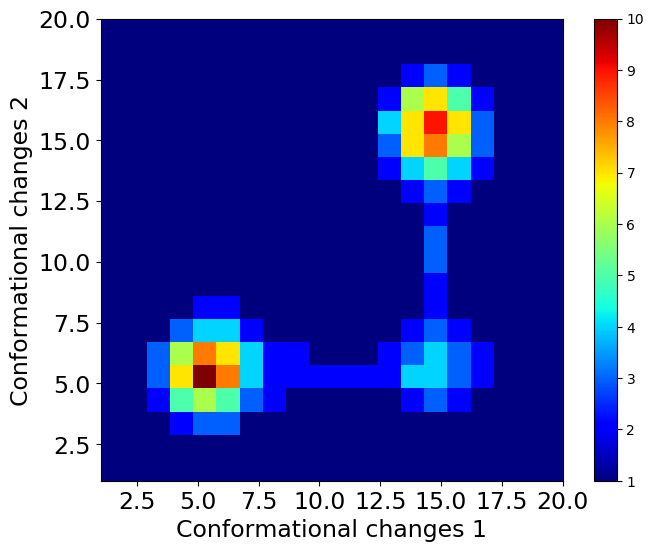

In [6]:
counts = grids.flatten()

# Scale the counts using MinMaxScaler
scaler = MinMaxScaler(feature_range=(1,10))
counts_scaled = scaler.fit_transform(counts.reshape(-1, 1))

# Reshape the scaled counts to match the shape of the original histogram
occ = counts_scaled.reshape(grids.shape)
occ = np.floor(occ)
plt.figure(figsize=(8,6))
plt.imshow(occ, origin='lower', extent=[1,20,1,20], cmap='jet')
plt.colorbar()
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.xlabel('Conformational changes 1', fontsize=17)
plt.ylabel('Conformational changes 2', fontsize=17)

1120.0


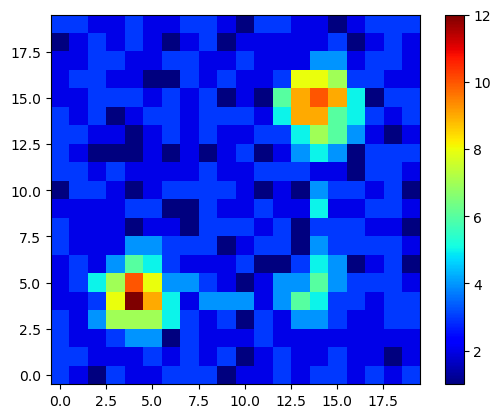

In [7]:
counts = grids.flatten()

# Scale the counts using MinMaxScaler
scaler = MinMaxScaler(feature_range=(1,10))
counts_scaled = scaler.fit_transform(counts.reshape(-1, 1))

# Reshape the scaled counts to match the shape of the original histogram
occ = counts_scaled.reshape(grids.shape)
occ = np.floor(occ)
# add noise
noise_rate = 400
np.random.seed(915)
# random_int = np.random.randint(0,20,size=(2,noise_rate))
# occ[random_int[0], random_int[1]] -= 1
random_int = np.random.randint(0,20,size=(2,noise_rate))
occ[random_int[0], random_int[1]] += 1
random_int = np.random.randint(0,20,size=(2,noise_rate))
occ[random_int[0], random_int[1]] += 1
 

# Plot the rescaled histogram
plt.imshow(occ, origin='lower', cmap='jet')
plt.colorbar()
print(np.sum(occ))

In [9]:
np.save(f'{workdir}/noise_occ_{np.sum(occ, dtype=int)}.npy', occ)